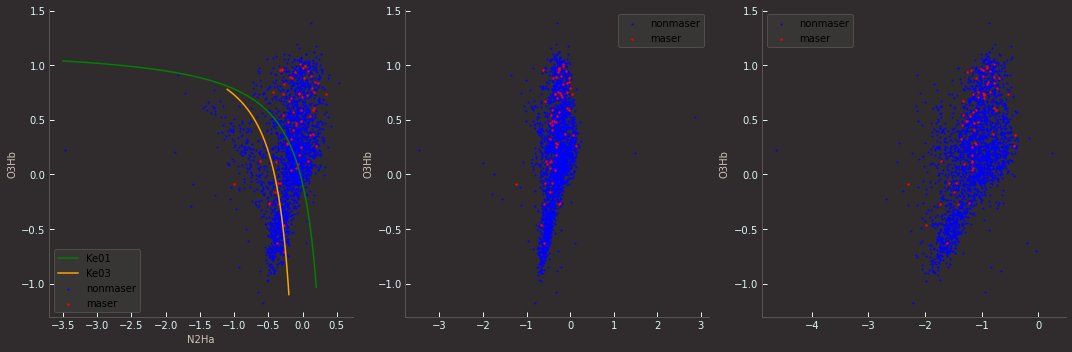

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

all_path = "./data/masers_and_nonmasers_in_MPA.csv"
all_df = pd.read_csv(all_path)



def set_up_style(ax):
    fig = ax.figure
    fig.patch.set_facecolor('#302c2e')  # Set background color to blackish

    ax.set_facecolor('#302c2e')  # Set background color to blackish
    for pos in ['bottom', 'top', 'left', 'right']:
        ax.spines[pos].set_color('#5a5353')  # Set color for plot spines (borders)

    ax.tick_params(axis='x', colors='#dff6f5')  # Set x-axis tick color to whiteish
    ax.tick_params(axis='y', colors='#dff6f5')  # Set y-axis tick color to whiteish


    ax.xaxis.label.set_color('#cfc6b8')  # Set color for x-axis label text
    ax.yaxis.label.set_color('#cfc6b8')  # Set color for y-axis label text

    ax.tick_params(axis='both', which='both', length=5, width=1, direction='in')  # Customize tick marks

    ax.spines['bottom'].set_linewidth(1)  # Set bottom spine thickness
    ax.spines['left'].set_linewidth(1)  # Set left spine thickness
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.spines['right'].set_visible(False)  # Hide right spine

    ax.legend(facecolor='#3b3838', edgecolor='#5a5353')  # Customize legend background and border color



# Create three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Extract data columns as NumPy arrays
x_columns = ["N2Ha", "S2Ha", "O1Ha"]
x_col_labels = ["LOG ([NII]/Hα)","LOG ([SII]/Hα)","LOG ([OI]/Hα)"]
y_data = all_df["O3Hb"].values
is_maser = all_df["is_maser"].values


# Plotting the data
for i, ax in enumerate(axes):
    x_data = all_df[x_columns[i]].values

    # Mask for maser and non-maser points
    maser_mask = is_maser == 1
    non_maser_mask = is_maser == 0

    
    # Plotting non-maser points
    ax.scatter(x_data[non_maser_mask], y_data[non_maser_mask], color="blue",s=1,label ="nonmaser")

    # Plotting maser points
    ax.scatter(x_data[maser_mask], y_data[maser_mask], color="red",s=2,label="maser")

    if i == 0:
        xvals=np.linspace(-3.5,0.2,1000)
        yvals=(0.6/(xvals-0.47))+1.19
        ax.plot(xvals,yvals,color="green",label="Ke01")

        xvals=np.linspace(-1.1,-.2,1000)
        yvals=(0.6/(xvals-0.05))+1.3
        ax.plot(xvals,yvals,color="orange",label="Ke03")
        ax.set_xlabel(x_columns[i])

    ax.set_ylabel("LOG ([OIII]/Hβ)",color='#cfc6b8')
    ax.set_ylabel(x_col_labels[i],color='#cfc6b8')
    legend = ax.legend()
    set_up_style(ax)


plt.tight_layout()
plt.show()
